# Qpid
Can we learn about the "q" (mass ratio) distribution of binary stars using the CMD?

I mean, I know we can, so: Can we do it quickly for a LOT of stars?

OK, again, I know it can be done, mabye the question is: Can *I* do this?!

MAYBE!

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})
from glob import glob

<img src="https://upload.wikimedia.org/wikipedia/en/3/3a/Q_portrait.jpg" width=100px>

In [3]:
# https://en.wikipedia.org/wiki/Qpid
# https://github.com/jradavenport/gaia_unresolved

In [11]:
iso_dir = '/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/'

Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')


In [12]:
Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(iso_dir + Mfile, delim_whitespace=True, comment='#', names=Mnames)


trange = [8.5, 9.3] # max/min ages to consider - need to add...
mok = np.where((mist['phase']==0) & 
               (mist['log10_isochrone_age_yr'] == 9.) &
               (mist['Gaia_G_DR2Rev'] > 2))[0][::-1]

In [13]:
mist.columns

Index(['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass',
       'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U',
       'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J',
       '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp',
       'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev',
       'Gaia_RP_DR2Rev', 'TESS', 'phase'],
      dtype='object')

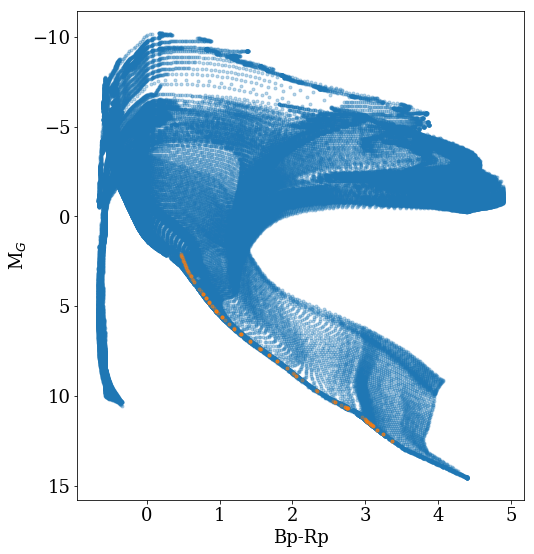

In [14]:
plt.figure(figsize=(8,9))
plt.plot(mist['Gaia_BP_DR2Rev'] - mist['Gaia_RP_DR2Rev'], mist['Gaia_G_DR2Rev'], '.', alpha=0.3)
plt.plot(mist['Gaia_BP_DR2Rev'][mok] - mist['Gaia_RP_DR2Rev'][mok], mist['Gaia_G_DR2Rev'][mok], '.', alpha=0.3)
plt.xlabel('Bp-Rp')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()

In [15]:
Mrange = np.arange(0.2, 1.33, 0.01)
qrange = np.arange(0,1.01, 0.01)
Msort = np.argsort(mist['star_mass'][mok])

Gbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_G_DR2Rev'][mok].values[Msort])
bpbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_BP_DR2Rev'][mok].values[Msort])
rpbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_RP_DR2Rev'][mok].values[Msort])

f1G = 10**(-0.4 * Gbig)
f1bp = 10**(-0.4 * bpbig)
f1rp = 10**(-0.4 * rpbig)


In [17]:
# plt.plot(mist['star_mass'][mok])
# plt.plot(Gbig)

In [18]:
# for k in range(len(f1G)-1):
#     print(Mrange[k] / Mrange[k:])

## Fixed age, fixed [Fe/H]

In [19]:
# demo for 1 [Fe/H] sample, make the model!
# the bookkeeping will be hell later, until i get smarter (i.e. try it once)

# the points to save
bprp = [] 
mg = [] 
q = []

for k in range(len(f1G)-1):
    dG = -2.5 * np.log10(f1G[k] + f1G[k:]) - Gbig[k]
    dbp = -2.5 * np.log10(f1bp[k] + f1bp[k:]) - bpbig[k]
    drp = -2.5 * np.log10(f1rp[k] + f1rp[k:]) - rpbig[k]
    
    dq = Mrange[k] / Mrange[k:]

    mg = np.append(mg, Gbig[k] + dG)
    bprp = np.append(bprp, (bpbig[k] + dbp) - (rpbig[k] + drp))
    
    q = np.append(q, dq)
    

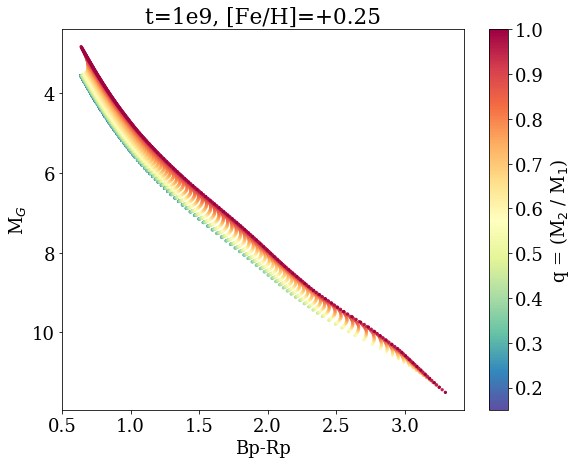

In [21]:
plt.figure(figsize=(9,7))
plt.scatter(bprp, mg, c=q, cmap=plt.cm.Spectral_r, s=5)
plt.title('t=1e9, [Fe/H]=+0.25')
cb = plt.colorbar()
cb.set_label('q = (M$_2$ / M$_1$)')
plt.xlabel('Bp-Rp')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()

In [22]:
mist['log10_isochrone_age_yr'].unique()[50]

7.5

## Include range of age

In [23]:

# the points to save
bprp = [] 
mg = [] 
q = []

    
for j in range(50,90):
    mok = np.where((mist['phase']==0) & 
               (mist['log10_isochrone_age_yr'] == mist['log10_isochrone_age_yr'].unique()[j]) &
               (mist['Gaia_G_DR2Rev'] > 2))[0][::-1]
    
    Msort = np.argsort(mist['star_mass'][mok])

    Gbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_G_DR2Rev'][mok].values[Msort])
    bpbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_BP_DR2Rev'][mok].values[Msort])
    rpbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_RP_DR2Rev'][mok].values[Msort])

    f1G = 10**(-0.4 * Gbig)
    f1bp = 10**(-0.4 * bpbig)
    f1rp = 10**(-0.4 * rpbig)


    for k in range(len(f1G)-1):
        dG = -2.5 * np.log10(f1G[k] + f1G[k:]) - Gbig[k]
        dbp = -2.5 * np.log10(f1bp[k] + f1bp[k:]) - bpbig[k]
        drp = -2.5 * np.log10(f1rp[k] + f1rp[k:]) - rpbig[k]

        dq = Mrange[k] / Mrange[k:]

        mg = np.append(mg, Gbig[k] + dG)
        bprp = np.append(bprp, (bpbig[k] + dbp) - (rpbig[k] + drp))

        q = np.append(q, dq)


In [24]:
q.shape

(262160,)

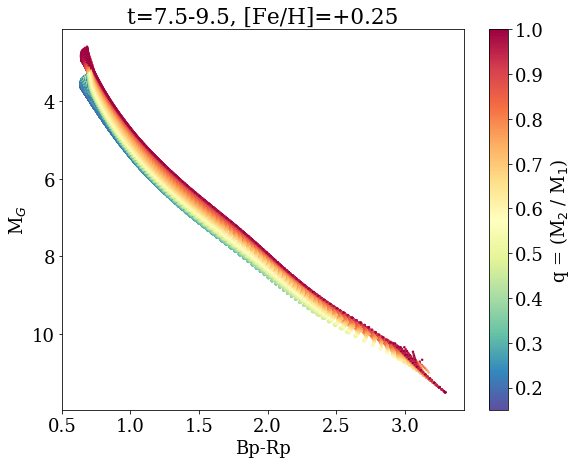

In [25]:
plt.figure(figsize=(9,7))
plt.scatter(bprp, mg, c=q, cmap=plt.cm.Spectral_r, s=2)

plt.title('t=7.5-9.5, [Fe/H]=+0.25')
cb = plt.colorbar()
cb.set_label('q = (M$_2$ / M$_1$)')
plt.xlabel('Bp-Rp')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()

(7, 4.5)

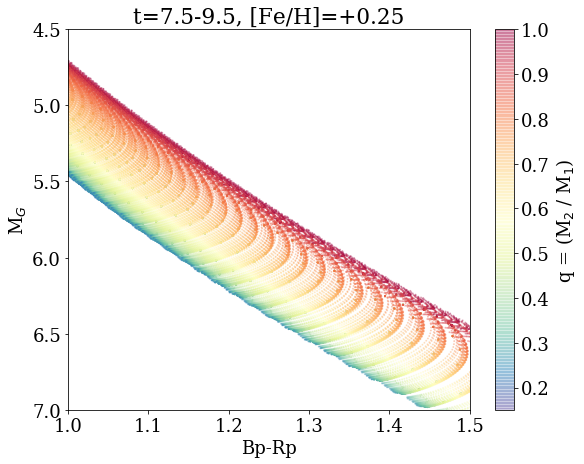

In [26]:
plt.figure(figsize=(9,7))
plt.scatter(bprp, mg, c=q, cmap=plt.cm.Spectral_r, s=1, alpha=0.3)

plt.title('t=7.5-9.5, [Fe/H]=+0.25')
cb = plt.colorbar()
cb.set_label('q = (M$_2$ / M$_1$)')
plt.xlabel('Bp-Rp')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.xlim(1,1.5)
plt.ylim(7,4.5)

## Now vary age & [Fe/H]
But binaries have *same* age and [Fe/H] between components

In [29]:
MfileS = glob(iso_dir + '/*.cmd', recursive=True)#'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'


# the points to save
bprp = [] 
mg = [] 
q = []

# loop over MIST isochrone (Fe/H)
for i in range(len(MfileS)):
    mist = pd.read_table(MfileS[i], delim_whitespace=True, comment='#', names=Mnames)
    
    # loop over all ages
    for j in range(50,90):
        mok = np.where((mist['phase']==0) & 
                   (mist['log10_isochrone_age_yr'] == mist['log10_isochrone_age_yr'].unique()[j]) &
                   (mist['Gaia_G_DR2Rev'] > 2))[0][::-1]

        Msort = np.argsort(mist['star_mass'][mok])

        Gbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_G_DR2Rev'][mok].values[Msort])
        bpbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_BP_DR2Rev'][mok].values[Msort])
        rpbig = np.interp(Mrange, mist['star_mass'][mok].values[Msort], mist['Gaia_RP_DR2Rev'][mok].values[Msort])

        f1G = 10**(-0.4 * Gbig)
        f1bp = 10**(-0.4 * bpbig)
        f1rp = 10**(-0.4 * rpbig)

        # loop over stars to make the actual binaries
        for k in range(len(f1G)-1):
            dG = -2.5 * np.log10(f1G[k] + f1G[k:]) - Gbig[k]
            dbp = -2.5 * np.log10(f1bp[k] + f1bp[k:]) - bpbig[k]
            drp = -2.5 * np.log10(f1rp[k] + f1rp[k:]) - rpbig[k]

            dq = Mrange[k] / Mrange[k:]

            mg = np.append(mg, Gbig[k] + dG)
            bprp = np.append(bprp, (bpbig[k] + dbp) - (rpbig[k] + drp))

            q = np.append(q, dq)



/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
q.shape

(3932400,)

(13, 2)

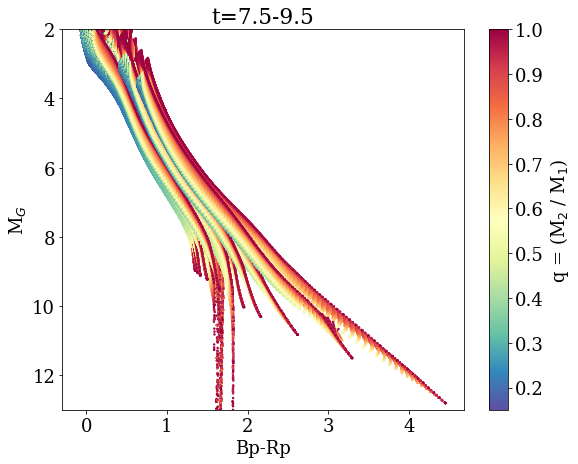

In [33]:
plt.figure(figsize=(9,7))
plt.scatter(bprp, mg, c=q, cmap=plt.cm.Spectral_r, s=2)

plt.title('t=7.5-9.5')
cb = plt.colorbar()
cb.set_label('q = (M$_2$ / M$_1$)')
plt.xlabel('Bp-Rp')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.ylim(13,2)

(7, 4.5)

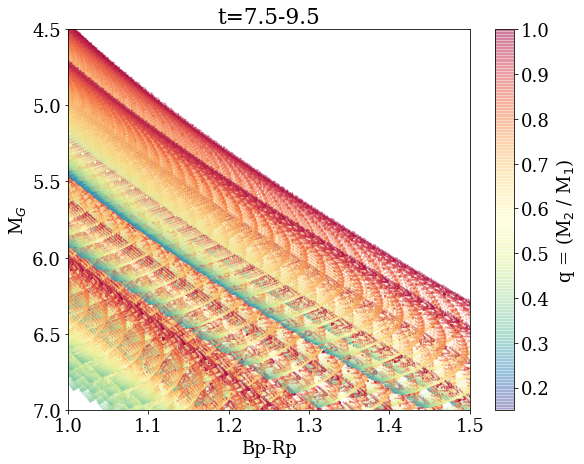

In [32]:
plt.figure(figsize=(9,7))
plt.scatter(bprp, mg, c=q, cmap=plt.cm.Spectral_r, s=1, alpha=0.3)

plt.title('t=7.5-9.5')
cb = plt.colorbar()
cb.set_label('q = (M$_2$ / M$_1$)')
plt.xlabel('Bp-Rp')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.xlim(1,1.5)
plt.ylim(7,4.5)

In [34]:
MfileS

['/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd',
 '/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_p0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd',
 '/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_m4.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd',
 '/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_m0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd',
 '/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_m1.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd',
 '/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_m1.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd',
 '/Users/james/Dropbox/research_projects/gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.